<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(0)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0'

In [4]:
os.listdir(base_path)

['data_add_delta_0_n20.csv',
 'data_add_delta_0_n30.csv',
 'data_add_delta_0_n60.csv',
 'data_add_delta_0_n120.csv',
 'data_add_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.990213,48.400385,28.304719,-0.407771,173.287546,173.448906,-0.161360
1,0.0,1.0,62.515146,99.611584,39.834445,-1.111637,210.849538,212.002642,-1.153104
2,0.0,2.0,93.821643,54.886906,93.562132,-0.414918,251.855763,252.165626,-0.309863
3,0.0,3.0,85.809941,94.205691,49.024931,-0.767991,238.272573,239.028738,-0.756165
4,0.0,4.0,86.982091,49.438096,99.022522,-0.431835,245.010873,245.339994,-0.329121
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,99.547227,37.961952,97.556931,-0.212500,244.853609,244.914464,-0.060855
119996,999.0,116.0,53.526659,92.909308,79.071552,1.499344,237.006863,235.694910,1.311954
119997,999.0,117.0,77.416154,91.005536,58.765486,0.614874,237.802049,237.353194,0.448856
119998,999.0,118.0,92.294437,47.592520,85.341210,0.954626,236.182794,235.130400,1.052394


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.990213,48.400385,28.304719,-0.407771,173.287546,173.448906,-0.161360
1,0.0,1.0,62.515146,99.611584,39.834445,-1.111637,210.849538,212.002642,-1.153104
2,0.0,2.0,93.821643,54.886906,93.562132,-0.414918,251.855763,252.165626,-0.309863
3,0.0,3.0,85.809941,94.205691,49.024931,-0.767991,238.272573,239.028738,-0.756165
4,0.0,4.0,86.982091,49.438096,99.022522,-0.431835,245.010873,245.339994,-0.329121
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,99.547227,37.961952,97.556931,-0.212500,244.853609,244.914464,-0.060855
119996,999.0,116.0,53.526659,92.909308,79.071552,1.499344,237.006863,235.694910,1.311954
119997,999.0,117.0,77.416154,91.005536,58.765486,0.614874,237.802049,237.353194,0.448856
119998,999.0,118.0,92.294437,47.592520,85.341210,0.954626,236.182794,235.130400,1.052394


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    86.990213  48.400385  28.304719  ...  173.287546  173.448906 -0.161360
      1.0    62.515146  99.611584  39.834445  ...  210.849538  212.002642 -1.153104
      2.0    93.821643  54.886906  93.562132  ...  251.855763  252.165626 -0.309863
      3.0    85.809941  94.205691  49.024931  ...  238.272573  239.028738 -0.756165
      4.0    86.982091  49.438096  99.022522  ...  245.010873  245.339994 -0.329121
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  99.547227  37.961952  97.556931  ...  244.853609  244.914464 -0.060855
      116.0  53.526659  92.909308  79.071552  ...  237.006863  235.694910  1.311954
      117.0  77.416154  91.005536  58.765486  ...  237.802049  237.353194  0.448856
      118.0  92.294437  47.592520  85.341210  ...  236.182794  235.130400  1.052394
      119.0  69.303118  63.052722  29.290143  ...  171.860106  171.609816  0.250290

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    86.990213  48.400385  28.304719  ...  173.287546  173.448906 -0.161360
      1.0    62.515146  99.611584  39.834445  ...  210.849538  212.002642 -1.153104
      2.0    93.821643  54.886906  93.562132  ...  251.855763  252.165626 -0.309863
      3.0    85.809941  94.205691  49.024931  ...  238.272573  239.028738 -0.756165
      4.0    86.982091  49.438096  99.022522  ...  245.010873  245.339994 -0.329121
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  99.547227  37.961952  97.556931  ...  244.853609  244.914464 -0.060855
      116.0  53.526659  92.909308  79.071552  ...  237.006863  235.694910  1.311954
      117.0  77.416154  91.005536  58.765486  ...  237.802049  237.353194  0.448856
      118.0  92.294437  47.592520  85.341210  ...  236.182794  235.130400  1.052394
      119.0  69.303118  63.052722  29.290143  ...  171.860106  171.609816  0.250290

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.990213,48.400385,28.304719,-0.407771,173.287546,173.448906,-0.161360
1,0.0,1.0,62.515146,99.611584,39.834445,-1.111637,210.849538,212.002642,-1.153104
2,0.0,2.0,93.821643,54.886906,93.562132,-0.414918,251.855763,252.165626,-0.309863
3,0.0,3.0,85.809941,94.205691,49.024931,-0.767991,238.272573,239.028738,-0.756165
4,0.0,4.0,86.982091,49.438096,99.022522,-0.431835,245.010873,245.339994,-0.329121
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,99.547227,37.961952,97.556931,-0.212500,244.853609,244.914464,-0.060855
119996,999.0,116.0,53.526659,92.909308,79.071552,1.499344,237.006863,235.694910,1.311954
119997,999.0,117.0,77.416154,91.005536,58.765486,0.614874,237.802049,237.353194,0.448856
119998,999.0,118.0,92.294437,47.592520,85.341210,0.954626,236.182794,235.130400,1.052394


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    86.990213  48.400385  28.304719  ...  173.287546  173.448906 -0.161360
      1.0    62.515146  99.611584  39.834445  ...  210.849538  212.002642 -1.153104
      2.0    93.821643  54.886906  93.562132  ...  251.855763  252.165626 -0.309863
      3.0    85.809941  94.205691  49.024931  ...  238.272573  239.028738 -0.756165
      4.0    86.982091  49.438096  99.022522  ...  245.010873  245.339994 -0.329121
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  99.547227  37.961952  97.556931  ...  244.853609  244.914464 -0.060855
      116.0  53.526659  92.909308  79.071552  ...  237.006863  235.694910  1.311954
      117.0  77.416154  91.005536  58.765486  ...  237.802049  237.353194  0.448856
      118.0  92.294437  47.592520  85.341210  ...  236.182794  235.130400  1.052394
      119.0  69.303118  63.052722  29.290143  ...  171.860106  171.609816  0.250290

[120000 rows x 7 columns]

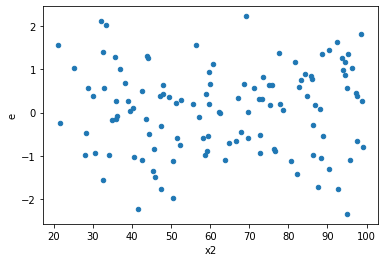

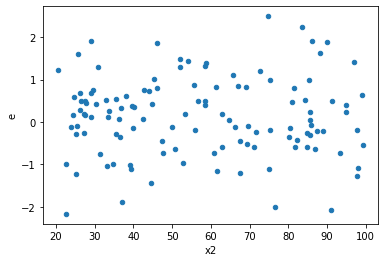

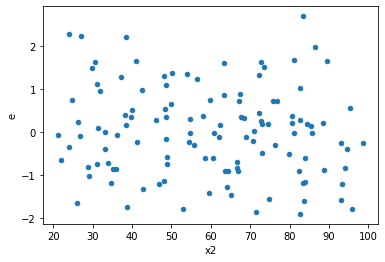

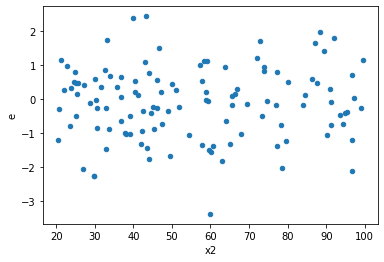

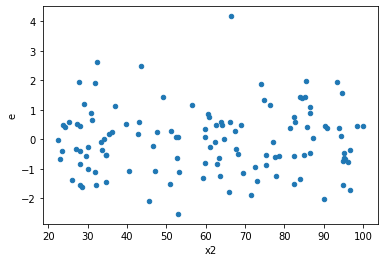

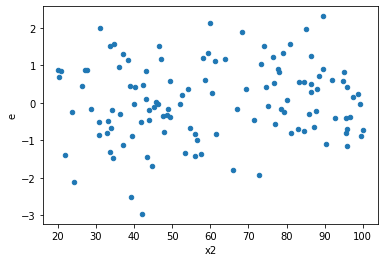

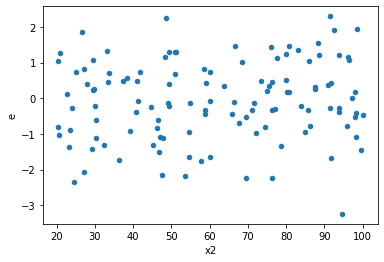

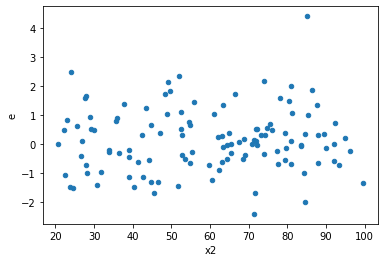

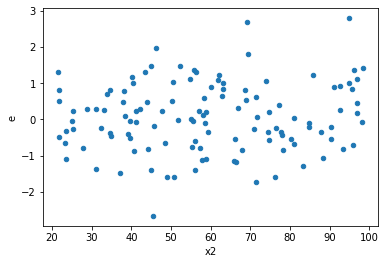

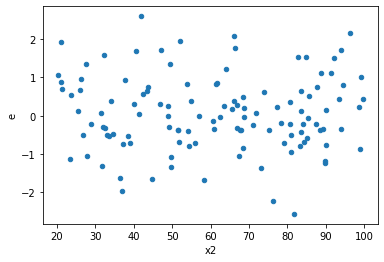

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,37.662493293035496,38.68756815317872,0.8369442954007889,0.8597237367373048,1.0272173924378176,0.9286294274343494,0.5356852862828253,0.4643147137171747,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,29.064031777462677,39.44701418591677,0.645867372832504,0.876600315242595,1.3572450817544675,0.30920142540338946,0.8453992872983053,0.15460071270169473,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,47.74576438217027,51.96115235266953,1.0610169862704504,1.1546922745037673,1.088288207866108,0.7778182870219637,0.6110908564890182,0.3889091435109818,Reject005=1 : Homoscedasticity
4.0,45.0,45.0,26.579452936137425,43.171434116914476,0.5906545096919428,0.9593652025980994,1.6242408833862263,0.10738027407835027,0.9463098629608249,0.053690137039175134,Reject005=1 : Homoscedasticity
5.0,45.0,45.0,40.08779538602459,49.52139307686356,0.890839897467213,1.1004754017080791,1.2353234344767114,0.48127425207520624,0.7593628739623969,0.24063712603760312,Reject005=1 : Homoscedasticity
6.0,45.0,45.0,38.645023656412064,41.73000180797476,0.8587783034758236,0.9273333735105502,1.0798286004167275,0.7978392659081899,0.6010803670459051,0.39891963295409494,Reject005=1 : Homoscedasticity
10.0,45.0,45.0,42.551244353585474,45.91749718635717,0.945583207857455,1.0203888263634926,1.0791105614867416,0.7995522746436179,0.6002238626781911,0.39977613732180894,Reject005=1 : Homoscedasticity
11.0,45.0,45.0,29.405632482574262,47.37952233687123,0.6534584996127614,1.052878274152694,1.6112396958286233,0.11327308147459814,0.9433634592627009,0.05663654073729907,Reject005=1 : Homoscedasticity
13.0,45.0,45.0,46.20144984477614,55.74416427383862,1.0266988854394699,1.2387592060853028,1.206545778565896,0.5314289839853852,0.7342855080073074,0.2657144919926926,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,37.662493293035496,38.68756815317872,0.8369442954007889,0.8597237367373048,1.0272173924378176,0.9286294274343494,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,29.064031777462677,39.44701418591677,0.645867372832504,0.876600315242595,1.3572450817544675,0.30920142540338946,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,47.74576438217027,51.96115235266953,1.0610169862704504,1.1546922745037673,1.088288207866108,0.7778182870219637,Reject005=1 : Homoscedasticity
3.0,45.0,45.0,41.903004547379595,40.457893096575305,0.9311778788306577,0.8990642910350067,0.9655129395513796,0.9068127308900609,Reject005=1 : Homoscedasticity
4.0,45.0,45.0,26.579452936137425,43.171434116914476,0.5906545096919428,0.9593652025980994,1.6242408833862263,0.10738027407835027,Reject005=1 : Homoscedasticity
5.0,45.0,45.0,40.08779538602459,49.52139307686356,0.890839897467213,1.1004754017080791,1.2353234344767114,0.48127425207520624,Reject005=1 : Homoscedasticity
6.0,45.0,45.0,38.645023656412064,41.73000180797476,0.8587783034758236,0.9273333735105502,1.0798286004167275,0.7978392659081899,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,47.95583328504618,34.50469682556394,1.0656851841121373,0.7667710405680875,0.7195099002965998,0.273274194644421,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,49.86417695125695,24.04670697158941,1.1080928211390433,0.5343712660353201,0.48224413680978745,0.01610265652897956,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      956
Reject005=0 : Heteroscedasticity     44
Name: Result_test, dtype: int64